## Pacchetti da installare

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

In [3]:
!pip install -q -U 'tensorflow-text==2.8.*'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 78.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 498.1/498.1 MB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 35.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.3/462.3 kB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 62.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 63.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-datasets 4.9.2 requires protobuf>=3.20, but you have protobuf 3.19.6 which is incompatible.
tensorflow-metadata 1.13.1 requires protobuf<5,>=3.20.3, but you have protobuf 3.19.6

In [4]:
!pip install -q tf-models-official

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 59.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.1/175.1 kB 22.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 32.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 45.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 94.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━

## Import notebook

In [5]:
import os
import re
import datetime
import pathlib
import json
from pathlib import Path
'''
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
'''
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from tensorflow_text.tools.wordpiece_vocab import bert_vocab_from_dataset as bert_vocab

import matplotlib.pyplot as plt

from typing import Tuple
from tensorboard.plugins.hparams import api as hp

In [6]:
tf.get_logger().setLevel('ERROR')
tf.config.run_functions_eagerly(True)

## Variabili Globali

In [7]:
# PARAMETRI GLOBALI
root_folder = 'drive/MyDrive/BERT/'

# DATI
data_folder_name = 'data'
train_filename = 'train_data.csv'

DATA_PATH = os.path.abspath(os.path.join(root_folder, data_folder_name))
train_data_filenamepath = os.path.abspath(os.path.join(DATA_PATH, train_filename))

# PATH LOG Tensorboard
PATH_LOG = 'logs/fit/transformer_multi_bert_dante'
PATH_LOG = os.path.abspath(os.path.join(root_folder, PATH_LOG))
log_dir =  os.path.abspath(os.path.join(PATH_LOG, datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))) 
log_history = os.path.abspath(os.path.join(PATH_LOG, 'histrory.json'))

# PATH WEIGHTS Tensorboard
PATH_WEIGHTS = 'weights/transformer_multi_bert_dante'
PATH_WEIGHTS = os.path.abspath(os.path.join(root_folder, PATH_WEIGHTS))
checkpoint_path = os.path.abspath(os.path.join(PATH_WEIGHTS, 'cp.ckpt'))

# VOCABOLARIO
vocab_folder = 'vocab'
multilingual_vocab_finalname = 'multilingual_vocab.txt'
ita_vocab_finalname = 'ita_dante_vocab.txt'

VOCAB_PATH = os.path.abspath(os.path.join(root_folder, vocab_folder))
multilingual_vocab_filenamepath = os.path.abspath(os.path.join(VOCAB_PATH, multilingual_vocab_finalname))
ita_vocab_filenamepath = os.path.abspath(os.path.join(VOCAB_PATH, ita_vocab_finalname))

# parametri per il modello
ORIGINAL_COLUMN = 'Original'
TRANSLATE_COLUMN = 'Translate'
TYPE_COLUMN ='Type'

## Iper Parametri Modello

In [8]:
NUM_SAMPLES = 25000
TEST = 200
TEST_SIZE = 0.3

MAX_VOCAB_SIZE = 30000 
EMBEDDING_DIM = 128

BATCH_SIZE = 32
BUFFER_SIZE = 2000
MAX_SEQ_LENGTH = 128

NUM_LAYERS = 3 # Numero di layer di Decoder del Transformer
NUM_HEADS = 4 # Numero di meccanismi di multi-head attention
FF_DIM = 512 # Numero di celle dei Layer Feed Forward
DROPUOT = 0.1

# Ottimizzatore Adam
LEARNING_RATE_ADAM = 3e-4
BETA_1 = 0.66
BETA_2 = 0.999
EPSILON=1e-9
EPOCHS_ADAM = 10

# IMPOSTO IL DEBUG A TRUE 
debug = True
trainable = False
training = True

## Parametri BERT

In [9]:
bert_model_name = 'distilbert_multi_cased_L-6_H-768_A-12/1'  
tfhub_handle_preprocess = 'https://tfhub.dev/jeongukjae/distilbert_multi_cased_preprocess/2'
tfhub_handle_encoder =  'https://tfhub.dev/jeongukjae/distilbert_multi_cased_L-6_H-768_A-12/1'

if debug:
  print('BERT model name                    : ', bert_model_name)
  print('BERT model selected                : ', tfhub_handle_encoder)
  print('BERT preprocess                    : ', tfhub_handle_preprocess)

BERT model name                    :  distilbert_multi_cased_L-6_H-768_A-12/1
BERT model selected                :  https://tfhub.dev/jeongukjae/distilbert_multi_cased_L-6_H-768_A-12/1
BERT preprocess                    :  https://tfhub.dev/jeongukjae/distilbert_multi_cased_preprocess/2


## DATASET

### Caricamento Dati

In [10]:
def preprocess_sentence(w):
  '''
  Preprocessing dei testi di input, impostando tutti i caratteri
  minuscoli, aggiungendo uno spazio prima di ogni punto e sostituendo
  qualsiasi carattere con uno spazio se non è compreso nel seguente elenco:
  (a-z, A-Z, ".", "?", "!", ",", "'", "’")
  '''
  # inserimento di uno spazio tra ogni parola e il successivo punto,
  # punto esclamativo, punto interrogativo e virgola
  # esempio: "ciao, come và?" => "ciao , come và ?"
  w = re.sub(r"([?.!,])", r" \1 ", w) # inserimento di uno spazio

  # sostituzione dei caratteri apostrofo
  w = re.sub(r"([’]+)", "'", w)

  w = w.replace("á", "à")
  w = w.replace("é", "è")
  w = w.replace("í", "ì")
  w = w.replace("ó", "ò")
  w = w.replace("ú", "ù")
  w = w.replace('"', " ")
  w = w.replace(':', " ")
  w = w.replace('«', " ")
  w = w.replace('»', " ")
  w = w.replace('‘', " ")
  w = w.replace('-', " ")
  w = w.replace('[', " ")
  w = w.replace(']', " ")
  w = w.replace('(', " ")
  w = w.replace(')', " ")
  w = w.replace("•", " ")
  w = w.replace("..", ".")
  w = w.replace("...", ".")
  w = w.replace("\xa0", " ")
  w = w.replace("\xc3\xa8", " ")
  w = w.replace("\xe2\x80\xaf", " ")
  w = w.replace("   ", " ")
  w = w.replace("–", " ")
  w = w.replace("“", " ")
  w = w.replace("”", " ")
  w = w.replace("„", " ")
  w = w.replace("─", " ")
  w = w.replace("♪", " ")
  w = w.replace("#", " ")
  w = w.replace("/", " ")
  w = w.replace("=", " ")
  w = w.replace(">", " ")
  w = w.replace("\\", " ")
  w = w.replace("`", " ")
  w = w.replace("¡", " ")
  w = w.replace("¿", " ")
  w = w.replace("œ", " ")
  w = w.replace("♗", " ")
  w = w.replace("♘", " ")
  w = w.replace("《", " ")
  w = w.replace("》", " ")
  # w = w.replace("", " ")
  # w = w.replace("", " ")

  # inserimento di uno spazio dopo apostrofo
  w = re.sub(r"(['])", r"\1 ", w) 

  w = w.replace(" ' ", " '")

  w = re.sub(r'[" "]+', " ", w) # rimozione di più spazi consecutivi
  return w

In [11]:
df = pd.read_csv(
  train_data_filenamepath,
  usecols=[ORIGINAL_COLUMN, TRANSLATE_COLUMN, TYPE_COLUMN],
)

# Preprocessing dei dati di Input
df[ORIGINAL_COLUMN] = df[ORIGINAL_COLUMN].apply(lambda x : preprocess_sentence(x))

# Preprocessing dei dati Target con aggiunta del token di fine frase
df[TRANSLATE_COLUMN] = df[TRANSLATE_COLUMN].apply(lambda x : preprocess_sentence(x))

if debug:
  print(f'Dati totali presenti nel Dataset               : {len(df)}')
  print('----------------------------------- TRAIN SET -----------------------------------------')
  print((df[ORIGINAL_COLUMN].tolist())[-1:])
  print((df[TRANSLATE_COLUMN].tolist())[-1:])
  print((df[ORIGINAL_COLUMN].tolist())[:1])
  print((df[TRANSLATE_COLUMN].tolist())[:1])

Dati totali presenti nel Dataset               : 379582
----------------------------------- TRAIN SET -----------------------------------------
['Min önskan och vilja styrdes av gudomlig kärlek som driver solen och andra stjärnor framåt som ett hjul flyttade regelbundet . ']
[" ma già volgeva il mio disio e 'l velle , sì come rota ch' igualmente è mossa , l' amor che move il sole e l' altre stelle"]
["De même que , en temps de guerre , officiers et soldats se sentent autorisès par l' opinion gènèrale à commettre des actes qui , en temps de paix , sont tenus pour criminels , de même les rèvolutionnaires , dans leur lutte , se regardaient comme couverts par l' opinion de leur cercle , en vertu de laquelle les actes de cruautè qu' ils commettaient ètaient nobles et moraux , ètant commis par eux au prix de leur libertè , de leur vie , de tout ce qui est cher à la plupart des hommes . Ainsi s' expliquait , que des personnes excellentes , incapables non seulement de causer une souffrance , m

## Tokenizer

Creo due differenti tokenizer che mi servizranno per la predisposizione dei dati di input:


*   EncTokenizer classe custom per la tokenizzazione dei dati di input al Layer di Encoder di Bert
*   DecTokenizer classe custom per la tokenizzazione dei dati di input al Layer di Decoder



In [12]:
input_data_vocab = df[ORIGINAL_COLUMN].tolist()
target_data_vocab = df[TRANSLATE_COLUMN].tolist()

dataset = tf.data.Dataset.from_tensor_slices((input_data_vocab, target_data_vocab))
dataset = dataset.shuffle(len(input_data_vocab)).batch(BATCH_SIZE, drop_remainder=True)

train_multilingual = dataset.map(lambda multilingual, ita: multilingual)
train_ita = dataset.map(lambda multilingual, ita: ita)

/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


In [13]:
def write_vocab_file(filepath, vocab):
  with open(filepath, 'w') as f:
    for token in vocab:
      print(token, file=f)

In [14]:
def cleanup_text(reserved_tokens, token_txt):

  # Drop the reserved tokens, except for "[UNK]".
  bad_tokens = [re.escape(tok) for tok in reserved_tokens if tok != "[UNK]"]
  bad_token_re = "|".join(bad_tokens)

  bad_cells = tf.strings.regex_full_match(token_txt, bad_token_re)
  result = tf.ragged.boolean_mask(token_txt, ~bad_cells)

  # Join them into strings.
  result = tf.strings.reduce_join(result, separator=' ', axis=-1)

  return result

In [15]:
tokenizers = tf.Module()

### Classe EncTokenizer

Classe custom per la tokenizzazione dei dati di italiano e che crea i tre vettori necessari al layer di Encoder 
Bert:


*   input_word_ids
*   input_type_ids
*   input_mask





In [16]:
bert_tokenizer_params=dict(lower_case=True)
reserved_tokens = {
  'start_of_sequence_id': 101,
  'end_of_segment_id': 102,
  'padding_id': 0,
  'mask_id': 103
}

bert_vocab_args = dict(
  # The target vocabulary size
  vocab_size = MAX_VOCAB_SIZE,
  # Reserved tokens that must be included in the vocabulary
  reserved_tokens=reserved_tokens,
  # Arguments for `text.BertTokenizer`
  bert_tokenizer_params=bert_tokenizer_params,
  # Arguments for `wordpiece_vocab.wordpiece_tokenizer_learner_lib.learn`
  learn_params={},
)

In [17]:
exist_vocab = Path(multilingual_vocab_filenamepath)

if not exist_vocab.exists():
  multilingual_vocab = bert_vocab.bert_vocab_from_dataset(
      train_multilingual.batch(MAX_VOCAB_SIZE).prefetch(tf.data.AUTOTUNE),
      **bert_vocab_args
  )

  write_vocab_file(multilingual_vocab_filenamepath, multilingual_vocab)

In [18]:
class EncTokenizer(tf.Module):
  def __init__(self, tfhub_handle_preprocess):
    self.preprocessor = hub.KerasLayer(tfhub_handle_preprocess)
    
  @tf.function
  def tokenize(self, strings):
    return self.preprocessor(strings)

In [19]:
tokenizers.multilingual = EncTokenizer(tfhub_handle_preprocess)

### Classe DecTokenizer

Classe custom per la tokenizzazione dei dati in lingua italiana per il layer di Decoder


In [20]:
bert_tokenizer_params=dict(lower_case=True)
reserved_tokens_vocab=["[PAD]", "[UNK]", "[START]", "[END]"]

bert_vocab_args = dict(
  # The target vocabulary size
  vocab_size = MAX_VOCAB_SIZE,
  # Reserved tokens that must be included in the vocabulary
  reserved_tokens=reserved_tokens_vocab,
  # Arguments for `text.BertTokenizer`
  bert_tokenizer_params=bert_tokenizer_params,
  # Arguments for `wordpiece_vocab.wordpiece_tokenizer_learner_lib.learn`
  learn_params={},
)

In [21]:
exist_vocab = Path(ita_vocab_filenamepath)

if not exist_vocab.exists():
  ita_vocab = bert_vocab.bert_vocab_from_dataset(
      train_ita.batch(MAX_VOCAB_SIZE).prefetch(tf.data.AUTOTUNE),
      **bert_vocab_args
  )

  write_vocab_file(ita_vocab_filenamepath, ita_vocab)

In [22]:
START = tf.argmax(tf.constant(reserved_tokens_vocab) == "[START]")
END = tf.argmax(tf.constant(reserved_tokens_vocab) == "[END]")

def add_start_end(ragged):
  count = ragged.bounding_shape(out_type=tf.int32)[0]

  starts = tf.fill([count,1], START)
  starts = tf.cast(starts, tf.int32)

  ends = tf.fill([count,1], END)
  ends = tf.cast(ends, tf.int32)

  x = tf.concat([starts, ragged, ends], axis=1)
  return x

In [23]:
class DecTokenizer(tf.Module):
  def __init__(self, reserved_tokens_vocab, vocab_path):
    self.tokenizer = text.BertTokenizer(vocab_path, lower_case=True, token_out_type=tf.int32)
    self._reserved_tokens_vocab = reserved_tokens_vocab
    self._vocab_path = tf.saved_model.Asset(vocab_path)

    vocab = pathlib.Path(vocab_path).read_text().splitlines()
    self.vocab = tf.Variable(vocab)

    ## Create the signatures for export:   

    # Include a tokenize signature for a batch of strings. 
    self.tokenize.get_concrete_function(
        tf.TensorSpec(shape=[None], dtype=tf.string))
    
    # Include `detokenize` and `lookup` signatures for:
    #   * `Tensors` with shapes [tokens] and [batch, tokens]
    #   * `RaggedTensors` with shape [batch, tokens]
    self.detokenize.get_concrete_function(
        tf.TensorSpec(shape=[None, None], dtype=tf.int32))
    self.detokenize.get_concrete_function(
          tf.RaggedTensorSpec(shape=[None, None], dtype=tf.int32))

    self.lookup.get_concrete_function(
        tf.TensorSpec(shape=[None, None], dtype=tf.int32))
    self.lookup.get_concrete_function(
          tf.RaggedTensorSpec(shape=[None, None], dtype=tf.int32))

    # These `get_*` methods take no arguments
    self.get_vocab_size.get_concrete_function()
    self.get_vocab_path.get_concrete_function()
    self.get_reserved_tokens.get_concrete_function()
    
  @tf.function
  def tokenize(self, strings):
    enc = self.tokenizer.tokenize(strings)
    # Merge the `word` and `word-piece` axes.
    enc = enc.merge_dims(-2,-1)
    enc = add_start_end(enc)
    return enc

  @tf.function
  def detokenize(self, tokenized):
    words = self.tokenizer.detokenize(tokenized)
    return cleanup_text(self._reserved_tokens_vocab, words)

  @tf.function
  def lookup(self, token_ids):
    return tf.gather(self.vocab, token_ids)

  @tf.function
  def get_vocab_size(self):
    return tf.shape(self.vocab)[0]

  @tf.function
  def get_vocab_path(self):
    return self._vocab_path

  @tf.function
  def get_reserved_tokens(self):
    return tf.constant(self._reserved_tokens_vocab)

In [24]:
tokenizers.ita = DecTokenizer(reserved_tokens_vocab, ita_vocab_filenamepath)

### Analisi Dati Tokenizzati

In [25]:
print(f'Vocabolario Italiano : {tokenizers.ita.get_vocab_size()}')

Vocabolario Italiano : 23120


## Creazione dataset
Utilizzo della libreria tf.data per la gestione del dataset da utilizzare.
Verranno creati batch di esempi che verranno utilizzati durante l'addestramento.

In [26]:
def split_dataset(df: pd.DataFrame,
                  filter_column: str, 
                  debug: bool = False) -> Tuple:

  print(f'Lunghezza df {len(df)}')
  dataset = (df.loc[df[TYPE_COLUMN] == filter_column]).copy() 
  print(f'Lunghezza dataset {len(dataset)}')
  
  if NUM_SAMPLES > 0:
    dataset = dataset[:NUM_SAMPLES]

  input_data = dataset[ORIGINAL_COLUMN].tolist()
  target_data = dataset[TRANSLATE_COLUMN].tolist()

  train_input_data, validation_input_data, train_target_data, validation_target_data = train_test_split(
    input_data[:-TEST], 
    target_data[:-TEST], 
    test_size=TEST_SIZE, 
    random_state=42,
    shuffle=True
  ) 

  train_input_data = train_input_data[:(int((len(train_input_data) / BATCH_SIZE)) * BATCH_SIZE)]
  train_target_data = train_target_data[:(int((len(train_target_data) / BATCH_SIZE)) * BATCH_SIZE)]
  
  validation_input_data = validation_input_data[:(int((len(validation_input_data) / BATCH_SIZE)) * BATCH_SIZE)]
  validation_target_data = validation_target_data[:(int((len(validation_target_data) / BATCH_SIZE)) * BATCH_SIZE)]

  test_input_data = input_data[len(train_input_data)+len(validation_input_data):]
  test_target_data = target_data[len(train_target_data)+len(validation_target_data):]

  if debug:
    print(f'Dati totali presenti nel Dataset               : {len(df)}')
    print(f'Dati totali presenti nel Dataset di Train      : {len(train_input_data)}')
    print(f'Dati totali presenti nel Dataset di Validation : {len(validation_input_data)}')
    print(f'Dati totali presenti nel Dataset di Test       : {len(test_input_data)}\n')


    print('----------------------------------- TRAIN SET -----------------------------------------')
    print(train_input_data[-4:])
    print(train_target_data[-4:])
    print('--------------------------------- VALIDATION SET --------------------------------------')
    print(validation_input_data[-4:])
    print(validation_target_data[-4:])
    print('----------------------------------- TEST SET ------------------------------------------')
    print(test_input_data[-4:])
    print(test_target_data[-4:])

    print('-------------------------------- ANALISI DATI -----------------------------------------')
    print(f'Esempi nel Dataset di Train                            : {len(train_input_data)}')
    print(f'Frase più corta nel Dataset Input di Train             : {min(train_input_data, key = len)}')
    print(f'Frase più corta nel Dataset Target di Train            : {min(train_target_data, key = len)}')
    print(f'Frase più lunga nel Dataset Input di Train             : {max(train_input_data, key = len)}')
    print(f'Frase più lunga nel Dataset Target di Train            : {max(train_target_data, key = len)}')
    print('---------------------------------------------------------------------------------------')
    print(f'Esempi nel Dataset di Validation                       : {len(validation_input_data)}')
    print(f'Frase più corta nel Dataset Input di Validation        : {min(validation_input_data, key = len)}')
    print(f'Frase più corta nel Dataset Target di Validation       : {min(validation_target_data, key = len)}')
    print(f'Frase più lunga nel Dataset Input di Validation        : {max(validation_input_data, key = len)}')
    print(f'Frase più lunga nel Dataset Target di Validation       : {max(validation_target_data, key = len)}')
    print('---------------------------------------------------------------------------------------')
    print(f'Esempi nel Dataset di Test                             : {len(test_input_data)}')
    print(f'Frase più corta nel Dataset Input di Test              : {min(test_input_data, key = len)}')
    print(f'Frase più corta nel Dataset Target di Test             : {min(test_target_data, key = len)}')
    print(f'Frase più lunga nel Dataset Input di Test              : {max(test_input_data, key = len)}')
    print(f'Frase più lunga nel Dataset Target di Test             : {max(test_target_data, key = len)}')    

    print('\n--------------------------------- EXAMPLE ---------------------------------------------')
    print([min(train_input_data, key = len)])
    print(tokenizers.multilingual.tokenize([min(train_input_data, key = len)])['input_word_ids'][:, :32])
    print('------------------------------------------------------------------')
    print([min(train_target_data, key = len)])
    print(tokenizers.ita.tokenize([min(train_target_data, key = len)]))
    print('\n')
    print([max(train_input_data, key = len)])
    print(tokenizers.multilingual.tokenize([max(train_input_data, key = len)])['input_word_ids'])
    print('------------------------------------------------------------------')
    print([max(train_target_data, key = len)])
    print(tokenizers.ita.tokenize([max(train_target_data, key = len)]))  
  
  return train_input_data, validation_input_data, test_input_data, train_target_data, validation_target_data, test_target_data 

In [27]:
def prepare_batch(multilingual, ita):
  zero = tf.zeros([BATCH_SIZE, MAX_SEQ_LENGTH], tf.int32)

  # Tokenizzo l'input per l'Encoder
  encoder = tokenizers.multilingual.tokenize(multilingual)          

  # Tokenizzo l'input per il Decder e creo la variabile Target
  ita = tokenizers.ita.tokenize(ita)
  decoder = ita[:, :-1].to_tensor()  # Drop the [END] tokens
  target = ita[:, 1:].to_tensor()   # Drop the [START] tokens
  
  decoder = tf.concat([decoder, zero], 1)
  decoder = decoder[:, :(MAX_SEQ_LENGTH)]

  target = tf.concat([target, zero], 1)
  target = target[:, :(MAX_SEQ_LENGTH)]

  return (encoder, decoder), target

In [28]:
def make_batches(ds):
  return (
    ds
    .shuffle(BUFFER_SIZE)
    .batch(BATCH_SIZE)
    .map(prepare_batch, tf.data.AUTOTUNE)
    .prefetch(buffer_size=tf.data.AUTOTUNE))

In [29]:
def train_val_test_dataset(df: pd.DataFrame, 
                          filter_column: str, 
                          debug: bool = False) -> Tuple:

  # Recupero il dataset 
  train_input_data, validation_input_data, test_input_data, train_target_data, validation_target_data, test_target_data = split_dataset(df=df, filter_column=filter_column, debug=debug)

  # Definizione del dataset
  # [from_tensor_slices] permette di recuperare batch
  # di esempi dai dataset di riferimento
  train_dataset = tf.data.Dataset.from_tensor_slices((train_input_data, train_target_data))
  validation_dataset = tf.data.Dataset.from_tensor_slices((validation_input_data, validation_target_data))
  test_dataset = tf.data.Dataset.from_tensor_slices((test_input_data, test_target_data))

  # impostazione del recupero di esempi presi in maniera
  # casuale in gruppi di [BATCH_SIZE] tra quelli disponibili
  train_dataset = make_batches(train_dataset)
  validation_dataset = make_batches(validation_dataset)

  return train_dataset, validation_dataset, test_dataset

In [30]:
train_dataset_ita, validation_dataset_ita, test_dataset = train_val_test_dataset(df=df,
                                                                                 filter_column='ITA',
                                                                                 debug=debug)

Lunghezza df 379582
Lunghezza dataset 244398
Dati totali presenti nel Dataset               : 379582
Dati totali presenti nel Dataset di Train      : 17344
Dati totali presenti nel Dataset di Validation : 7424
Dati totali presenti nel Dataset di Test       : 232

----------------------------------- TRAIN SET -----------------------------------------
["C' est le braquage de banque le plus sanglant qu' a connu ce pays . ", "Il s' est converti au christianisme . ", 'Vous pouvez ècrire dans la langue que vous voulez . Sur Tatoeba , toutes les langues sont ègales . ', 'Elle a trois s urs une est infirmière et les autres sont enseignantes . ']
['È la rapina in banca più sanguinosa della storia di questo paese . ', 'Si è convertito al Cristianesimo . ', 'Puoi scrivere in qualsiasi lingua desideri . Su Tatoeba tutte le lingue sono uguali . ', 'Lei ha tre sorelle una è infermiera e le altre sono insegnanti . ']
--------------------------------- VALIDATION SET -----------------------------------

In [31]:
# Recupero un batch di esempi per la verifica delle classi custom che andrò a creare
for (enc_input, dec_input), target in train_dataset_ita.take(1):
  print('----------------------- ENCODER  -------------------------------')
  print(f'Shape                    : {enc_input}')
  print(f'Shape                    : {enc_input["input_word_ids"].shape}')
  print(f'Word Ids                 : {enc_input["input_word_ids"][0, :MAX_SEQ_LENGTH]}')
  print(f'Input Mask               : {enc_input["input_mask"][0, :MAX_SEQ_LENGTH]}')
  print('--------------------- DECODER ----------------------------------')
  print(f'Shape it input           : {dec_input.shape}')
  print(f'Example it input         : {dec_input[0]}')  
  print('--------------------- TARGET -----------------------------------')
  print(f'Shape it input           : {target.shape}')
  print(f'Example it target        : {target[0]}')  

----------------------- ENCODER  -------------------------------
Shape                    : {'input_mask': <tf.Tensor: shape=(32, 128), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int32)>, 'input_word_ids': <tf.Tensor: shape=(32, 128), dtype=int32, numpy=
array([[   101,    149,    112, ...,      0,      0,      0],
       [   101,  10282,  10176, ...,      0,      0,      0],
       [   101,  52208, 108835, ...,      0,      0,      0],
       ...,
       [   101,  12395,  22232, ...,      0,      0,      0],
       [   101,  52208, 108835, ...,      0,      0,      0],
       [   101,    147,    112, ...,      0,      0,      0]], dtype=int32)>}
Shape                    : (32, 128)
Word Ids                 : [  101   149   112 25205   171   112 10176   180   112 10106 46607 12606
   254 10109 16874 1

## Encoder BERT

Predispondo la classe necessaria per la costruzione di BERT


In [32]:
class EncoderBert(tf.keras.layers.Layer):
  def __init__(self, bert_encoder, name='EncoderBert', trainable=False):
    super(EncoderBert, self).__init__()

    self.encoder = hub.KerasLayer(bert_encoder, name='BERT_encoder', trainable=trainable)

  def call(self, x, debug=False):

    if debug:
      print(f'****************** DEBUG ENCODER BERT ******************')
      print(f"First example")
      print(f'Keys                         : {list(x.keys())}')
      print(f'Shape                        : {x["input_word_ids"].shape}')
      print(f'Word Ids                     : {x["input_word_ids"][0, :16]}')
      print(f'Input Mask                   : {x["input_mask"][0, :16]}')
      
    x = self.encoder(x)['sequence_output'] 

    if debug:
      print()
      print(f'Encoder Outputs BERT Shape   : {x.shape}')
      print(f'Encoder Outputs BERT Values  : {x[0, :1, :16]}')    
      print('*********************************************************') 

    return x

In [33]:
encoder_bert = EncoderBert(bert_encoder=tfhub_handle_encoder, 
                           trainable=trainable)

bert_outputs = encoder_bert(enc_input, debug) 

****************** DEBUG ENCODER BERT ******************
First example
Keys                         : ['input_mask', 'input_word_ids']
Shape                        : (32, 128)
Word Ids                     : [  101   149   112 25205   171   112 10176   180   112 10106 46607 12606
   254 10109 16874 13340]
Input Mask                   : [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

Encoder Outputs BERT Shape   : (32, 128, 768)
Encoder Outputs BERT Values  : [[-0.02675595  0.20671996 -0.30792287  0.2926382  -0.07164752  0.20722571
  -0.01046244 -0.16680665  0.13247347  0.687119    0.36972648 -0.35202214
   0.36901015  0.2839455  -0.3058512   0.23261765]]
*********************************************************


## Decoder

Predispondo la classe necessaria per la costruzione di un Layer di Decoder

### TOKEN AND POSITION EMBEDDING

Implementazione del blocco Embedding per l'utilizzo di vettori posizionali insieme ai vettori di token di parole tramite estensione della classe Layer di Keras. 

In [34]:
class TokenAndPositionEmbedding(tf.keras.layers.Layer):
  def __init__(self, maxlen, vocab_size, embed_dim):
    super(TokenAndPositionEmbedding, self).__init__()
    self.maxlen = maxlen
    self.token_emb = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embed_dim, name='Token_Embedding')
    self.pos_emb = tf.keras.layers.Embedding(input_dim=maxlen, output_dim=embed_dim, name='Positional_Embedding')

  def call(self, x, debug=False):
    x = tf.keras.preprocessing.sequence.pad_sequences(x, maxlen=self.maxlen, padding='post')
    maxlen = tf.shape(x)[-1]

    if debug:
      print('********** DEBUG TOKEN AND POSITION EMBEDDING ***********')
      print(f'Sequence Max len                          : {maxlen}')
      print(f'Sequence Shape                            : {tf.shape(x)}')

    positions = tf.range(start=0, limit=maxlen, delta=1)
    positions = self.pos_emb(positions)
    x = self.token_emb(x)
    output = x + positions

    if debug:
      print(f'Shape TokenAndPositionEmbedding           : {output.shape}')
      print('*********************************************************')

    return output

In [35]:
token_position_it = TokenAndPositionEmbedding(MAX_SEQ_LENGTH, tokenizers.ita.get_vocab_size(), EMBEDDING_DIM)

inputs_decoder = token_position_it(dec_input, debug)

********** DEBUG TOKEN AND POSITION EMBEDDING ***********
Sequence Max len                          : 128
Sequence Shape                            : [ 32 128]
Shape TokenAndPositionEmbedding           : (32, 128, 128)
*********************************************************


### LAYER DECODER

Implementazione di un blocco di DecoderTransformer tramite estensione della classe Layer di Keras

#### Layer Decoder

In [36]:
class Decoder(tf.keras.layers.Layer):
  def __init__(self, max_len, embed_dim, num_heads, ff_dim, rate=0.5, name='DECODER', num_layers_name=1):
    super(Decoder, self).__init__()
    self.att1 = tf.keras.layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim, name='Decoder_MultiHeadAttention_input_decoder_Block_'+str(num_layers_name))
    self.att2 = tf.keras.layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim, name='Decoder_MultiHeadAttention_output_encoder_Block_'+str(num_layers_name))
    self.ffn = tf.keras.Sequential(
      [
       tf.keras.layers.Dense(ff_dim, activation='relu', name='Decoder_FFN_Dense_1_Block_'+str(num_layers_name)), 
       tf.keras.layers.Dense(embed_dim, name='Decoder_FFN_Dense_2_Block_'+str(num_layers_name)),
      ]
    )
    self.layernorm1 = tf.keras.layers.LayerNormalization(name='Decoder_LayerNormalization_1_Block_'+str(num_layers_name))
    self.layernorm2 = tf.keras.layers.LayerNormalization(name='Decoder_LayerNormalization_2_Block_'+str(num_layers_name))
    self.layernorm3 = tf.keras.layers.LayerNormalization(name='Decoder_LayerNormalization_3_Block_'+str(num_layers_name))
    self.dropout1 = tf.keras.layers.Dropout(rate, name='Decoder_Dropout_1_Block_'+str(num_layers_name))
    self.dropout2 = tf.keras.layers.Dropout(rate, name='Decoder_Dropout_2_Block_'+str(num_layers_name))
    self.dropout3 = tf.keras.layers.Dropout(rate, name='Decoder_Dropout_3_Block_'+str(num_layers_name))

    self._name = name

  def call(self, inputs, bert_outputs, training=False, debug=False):
    attn_output1 = self.att1(query=inputs,
                             value=inputs, 
                             key=inputs, 
                             use_causal_mask=True)
    
    attn_output1 = self.dropout1(attn_output1)
    out1 = self.layernorm1(inputs + attn_output1)

    attn_output2 = self.att2(key=bert_outputs, 
                             value=bert_outputs, 
                             query=out1)
    
    attn_output2 = self.dropout2(attn_output2, training=training)
    out2 = self.layernorm2(out1 + attn_output2)

    ffn_output = self.ffn(out2)
    ffn_output = self.dropout3(ffn_output, training=training)
    
    output = self.layernorm3(out2 + ffn_output)

    if debug:
      print('******************* DEBUG DECODER ***********************')
      print(f'Input Shape                       : {inputs.shape}')
      print(f'Shape Outputs Decoder             : {output.shape}')
      print('*********************************************************')

    return output

In [37]:
decoder = Decoder(MAX_SEQ_LENGTH, 
                  EMBEDDING_DIM, 
                  NUM_HEADS, 
                  FF_DIM, 
                  DROPUOT)

outputs_decoder = decoder(inputs=inputs_decoder, 
                          bert_outputs=bert_outputs,
                          training=training,
                          debug=debug)

******************* DEBUG DECODER ***********************
Input Shape                       : (32, 128, 128)
Shape Outputs Decoder             : (32, 128, 128)
*********************************************************


## TRANSFORMER

Implementazione del blocco Transformer tramite estensione della classe Layer di Keras.

In [38]:
class TransformerBlock(tf.keras.Model):
  def __init__(self, 
               num_layers, 
               embed_dim, 
               num_heads, 
               ff_dim, 
               max_len,
               vocab_size,
               tfhub_handle_encoder,
               trainable,
               rate=0.5):
    
    super(TransformerBlock, self).__init__()

    self.num_layers = num_layers

    self.token_pos_dec = TokenAndPositionEmbedding(max_len, vocab_size, embed_dim)

    self.encoder = EncoderBert(tfhub_handle_encoder, trainable=trainable)
    self.decoder = [Decoder(max_len, embed_dim, num_heads, ff_dim, rate, num_layers_name=i+1) for i in range(num_layers)]

    self.dropout = tf.keras.layers.Dropout(rate, name='Transformer_Dropout_Pre_Final_Layer')
    self.final_layer = tf.keras.layers.Dense(vocab_size, name='Transformer_Final_Layer')

  def call(self, inputs, training=False, debug=False):
    inputs_encoder, inputs_decoder  = inputs

    encoder_output = self.encoder(inputs_encoder, debug=debug) 

    inputs_decoder = self.token_pos_dec(inputs_decoder, debug)

    if debug:
      print(f'---------------- DEBUG TRANSFORMER BLOCK ----------------')
      print(f'inputs_encoder       : {inputs_encoder["input_word_ids"].shape}')
      print(f'inputs_decoder       : {inputs_decoder.shape}')      

    transformer_output = inputs_decoder

    for i in range(self.num_layers):
      transformer_output = self.decoder[i](inputs=transformer_output, 
                                           bert_outputs=encoder_output,
                                           training=training,
                                           debug=debug)
    
    transformer_output = self.dropout(transformer_output)   
    transformer_output = self.final_layer(transformer_output)

    if debug:
      print(f'Output Shape       : {transformer_output.shape}')
      print(f'Output Transformer : {transformer_output[0, :1, :12]}')    
      print(f'---------------------------------------------------------')

    return transformer_output

In [39]:
transformer = TransformerBlock(NUM_LAYERS, 
                               EMBEDDING_DIM, 
                               NUM_HEADS, 
                               FF_DIM,
                               MAX_SEQ_LENGTH,
                               tokenizers.ita.get_vocab_size(),
                               tfhub_handle_encoder,
                               trainable,
                               DROPUOT)

transformer_output = transformer((enc_input, dec_input), 
                                 training=training,
                                 debug=debug)

****************** DEBUG ENCODER BERT ******************
First example
Keys                         : ['input_mask', 'input_word_ids']
Shape                        : (32, 128)
Word Ids                     : [  101   149   112 25205   171   112 10176   180   112 10106 46607 12606
   254 10109 16874 13340]
Input Mask                   : [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

Encoder Outputs BERT Shape   : (32, 128, 768)
Encoder Outputs BERT Values  : [[-0.02675595  0.20671996 -0.30792287  0.2926382  -0.07164752  0.20722571
  -0.01046244 -0.16680665  0.13247347  0.687119    0.36972648 -0.35202214
   0.36901015  0.2839455  -0.3058512   0.23261765]]
*********************************************************
********** DEBUG TOKEN AND POSITION EMBEDDING ***********
Sequence Max len                          : 128
Sequence Shape                            : [ 32 128]
Shape TokenAndPositionEmbedding           : (32, 128, 128)
*********************************************************
----------------

In [40]:
transformer.summary()

Model: "transformer_block"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 token_and_position_embeddin  multiple                 2975744   
 g_1 (TokenAndPositionEmbedd                                     
 ing)                                                            
                                                                 
 encoder_bert_1 (EncoderBert  multiple                 134734080 
 )                                                               
                                                                 
 DECODER (Decoder)           multiple                  1315456   
                                                                 
 DECODER (Decoder)           multiple                  1315456   
                                                                 
 DECODER (Decoder)           multiple                  1315456   
                                                 

## Addestramento Modello

### Compilazione

### Callbacks

In [41]:
# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 save_best_only=True)

# Create a callback Tensorboard
log_dir =  os.path.abspath(os.path.join(PATH_LOG, 'T_3_Dec_lr_1e4_no_enc_no_lstm_v7')) 
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1, write_graph=True)

# Create a callback save the log history
json_logging_callback = tf.keras.callbacks.LambdaCallback(
  on_epoch_end=lambda epoch, logs: json_log.write(
    json.dumps({'epoch': epoch, 
                'loss': logs['loss'],
                'masked_accuracy': logs['masked_accuracy'],
                'val_loss': logs['val_loss'],
                'val_masked_accuracy': logs['val_masked_accuracy']}) + '\n'),
  on_train_end=lambda logs: json_log.close()
)

### Train Ita

In [42]:
def masked_loss(label, pred):
  mask = label != 0
  loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')
  loss = loss_object(label, pred)

  mask = tf.cast(mask, dtype=loss.dtype)
  loss *= mask

  loss = tf.reduce_sum(loss)/tf.reduce_sum(mask)
  return loss

In [43]:
def masked_accuracy(label, pred):
  pred = tf.argmax(pred, axis=2)
  label = tf.cast(label, pred.dtype)
  match = label == pred

  mask = label != 0

  match = match & mask

  match = tf.cast(match, dtype=tf.float32)
  mask = tf.cast(mask, dtype=tf.float32)
  return tf.reduce_sum(match)/tf.reduce_sum(mask)

In [ ]:
transformer.compile(
  loss=masked_loss,
  optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE_ADAM,
                                     beta_1=BETA_1, 
                                     beta_2=BETA_2,
                                     epsilon=EPSILON),
  metrics=[masked_accuracy])

In [ ]:
start = datetime.datetime.now()
json_log = open(log_history, mode='a', buffering=1, encoding='utf-8')

transformer.fit(train_dataset_ita,
                initial_epoch=0,
                epochs=EPOCHS_ADAM,
                shuffle=True,
                validation_data=validation_dataset_ita,
                callbacks=[tensorboard_callback,
                           json_logging_callback, 
                           cp_callback
                          ])

end = datetime.datetime.now()
print(f'Tempo necessario per l\'addestramento: {end - start}')

Epoch 1/10
542/542 [==============================] - 294s 534ms/step - loss: 5.9708 - masked_accuracy: 0.2378 - val_loss: 4.6777 - val_masked_accuracy: 0.3515
Epoch 2/10
542/542 [==============================] - 289s 533ms/step - loss: 4.0616 - masked_accuracy: 0.4097 - val_loss: 3.6226 - val_masked_accuracy: 0.4661
Epoch 3/10
542/542 [==============================] - 287s 529ms/step - loss: 3.1749 - masked_accuracy: 0.5085 - val_loss: 3.0452 - val_masked_accuracy: 0.5398
Epoch 4/10
542/542 [==============================] - 286s 528ms/step - loss: 2.5597 - masked_accuracy: 0.5861 - val_loss: 2.6638 - val_masked_accuracy: 0.5912
Epoch 5/10
542/542 [==============================] - 286s 528ms/step - loss: 2.0946 - masked_accuracy: 0.6453 - val_loss: 2.3962 - val_masked_accuracy: 0.6282
Epoch 6/10
542/542 [==============================] - 289s 534ms/step - loss: 1.7337 - masked_accuracy: 0.6926 - val_loss: 2.2229 - val_masked_accuracy: 0.6499
Epoch 7/10
542/542 [====================

### Train Dante

In [44]:
train_dataset_dante, validation_dataset_dante, test_dataset = train_val_test_dataset(df=df, filter_column='DANTE', debug=debug)

Lunghezza df 379582
Lunghezza dataset 135184
Dati totali presenti nel Dataset               : 379582
Dati totali presenti nel Dataset di Train      : 17344
Dati totali presenti nel Dataset di Validation : 7424
Dati totali presenti nel Dataset di Test       : 232

----------------------------------- TRAIN SET -----------------------------------------
['E al pelare conviene avere maniera , ', 'essayer , comprendre et ècouter', 'e così si pentirà della sua follia . ', 'mostrando di fare vita agreste , ']
['E al pelar convien aver maniera , ', 'A ritenere intendi , e a udire , ', 'Sì ssi ripentirà di sua follia . ', "Mostrando ched i' faccia vita agresta;"]
--------------------------------- VALIDATION SET --------------------------------------
['Si je le dis pour le tromper . ', "con tutt' altro che nobile e vero amore . ", 'ihren Status und ihren Zustand;', "Et il n' a jamais dit un vrai mot . "]
["Ched i' non dica ciò per inghanarlo . ", 'Se non di fino e di leal amore . ', 'Di loro stat

In [45]:
# Carico i pesi modello
latest = tf.train.latest_checkpoint(PATH_WEIGHTS)
transformer.load_weights(latest)

In [46]:
transformer.compile(
  loss=masked_loss,
  optimizer=tf.keras.optimizers.Adam(learning_rate=3e-4,
                                     beta_1=BETA_1, 
                                     beta_2=BETA_2,
                                     epsilon=EPSILON),
  metrics=[masked_accuracy])

In [47]:
start = datetime.datetime.now()

json_log = open(log_history, mode='a', buffering=1, encoding='utf-8')

transformer.fit(train_dataset_dante,
                initial_epoch=EPOCHS_ADAM,
                epochs=EPOCHS_ADAM+5,
                shuffle=True,
                validation_data=validation_dataset_dante,
                callbacks=[# tensorboard_callback,
                           json_logging_callback, 
                           # cp_callback
                           ])

end = datetime.datetime.now()
print(f'Tempo necessario per l\'addestramento: {end - start}')

Epoch 11/15
542/542 [==============================] - 554s 1s/step - loss: 3.9851 - masked_accuracy: 0.3907 - val_loss: 2.8506 - val_masked_accuracy: 0.4934
Epoch 12/15
542/542 [==============================] - 547s 1s/step - loss: 2.3826 - masked_accuracy: 0.5502 - val_loss: 1.9721 - val_masked_accuracy: 0.6096
Epoch 13/15
542/542 [==============================] - 547s 1s/step - loss: 1.5945 - masked_accuracy: 0.6744 - val_loss: 1.3813 - val_masked_accuracy: 0.7091
Epoch 14/15
542/542 [==============================] - 530s 978ms/step - loss: 1.1152 - masked_accuracy: 0.7621 - val_loss: 1.0257 - val_masked_accuracy: 0.7766
Epoch 15/15
542/542 [==============================] - 526s 971ms/step - loss: 0.8239 - masked_accuracy: 0.8160 - val_loss: 0.8009 - val_masked_accuracy: 0.8201
Tempo necessario per l'addestramento: 0:45:42.680292


In [54]:
start = datetime.datetime.now()

json_log = open(log_history, mode='a', buffering=1, encoding='utf-8')

transformer.fit(train_dataset_dante,
                initial_epoch=15,
                epochs=25,
                shuffle=True,
                validation_data=validation_dataset_dante,
                callbacks=[# tensorboard_callback,
                           json_logging_callback, 
                           # cp_callback
                           ])

end = datetime.datetime.now()
print(f'Tempo necessario per l\'addestramento: {end - start}')

Epoch 16/25
542/542 [==============================] - 549s 1s/step - loss: 0.6501 - masked_accuracy: 0.8494 - val_loss: 0.6912 - val_masked_accuracy: 0.8401
Epoch 17/25
542/542 [==============================] - 549s 1s/step - loss: 0.5381 - masked_accuracy: 0.8710 - val_loss: 0.5944 - val_masked_accuracy: 0.8610
Epoch 18/25
542/542 [==============================] - 551s 1s/step - loss: 0.4553 - masked_accuracy: 0.8879 - val_loss: 0.5426 - val_masked_accuracy: 0.8692
Epoch 19/25
542/542 [==============================] - 535s 986ms/step - loss: 0.3940 - masked_accuracy: 0.8998 - val_loss: 0.5306 - val_masked_accuracy: 0.8702
Epoch 20/25
542/542 [==============================] - 553s 1s/step - loss: 0.3456 - masked_accuracy: 0.9103 - val_loss: 0.4818 - val_masked_accuracy: 0.8823
Epoch 21/25
542/542 [==============================] - 533s 984ms/step - loss: 0.3054 - masked_accuracy: 0.9187 - val_loss: 0.4840 - val_masked_accuracy: 0.8821
Epoch 22/25
542/542 [=========================

## Valutazione dell'addestramento
Avendo in output il log ed i risultati dell'addestramento, possiamo visualizzare
queste informazioni relativamente alle metriche di interesse.

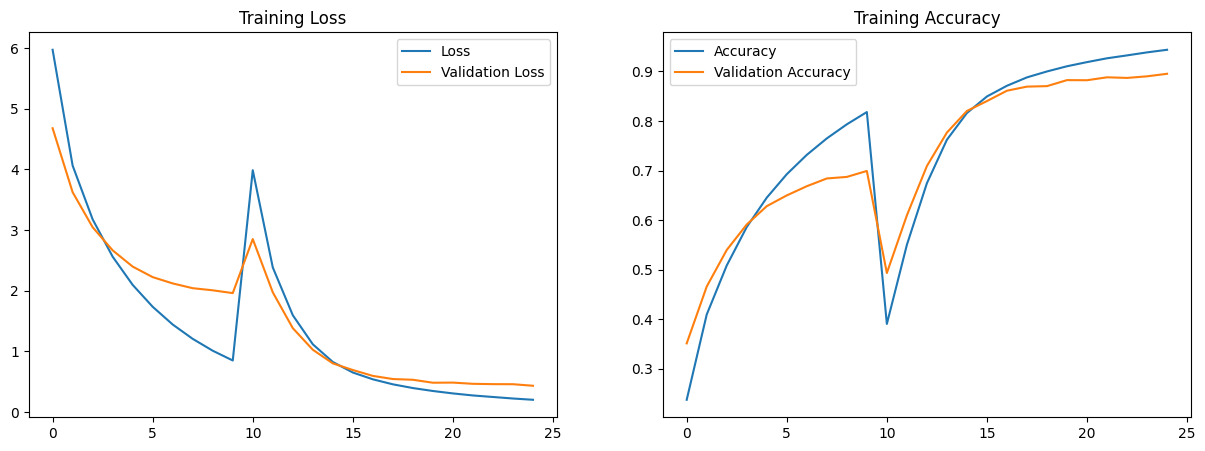

In [55]:
# Recupero il log di addestramento
df_history = pd.read_json(log_history, lines=True)

# visualizzazione andamento addestramento
# su un grafico composto da due sub-plot
# uno per il loss, l'altro per l'accuracy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

# Errore durante l'addestramento
ax1.plot(df_history['loss'], label='Loss')
ax1.plot(df_history['val_loss'], label='Validation Loss')
ax1.set_title('Training Loss')
ax1.legend()

# Accuratezza durante l'addestramento
ax2.plot(df_history['masked_accuracy'], label='Accuracy')
ax2.plot(df_history['val_masked_accuracy'], label='Validation Accuracy')
ax2.set_title('Training Accuracy')
ax2.legend()

plt.show()

## Test del modello
La seguente cella permette di caricare l'ultimo checkpoint dell'addestramento
precedentemente salvato.

In [ ]:
trainable = False

transformer = TransformerBlock(NUM_LAYERS, 
                               EMBEDDING_DIM, 
                               NUM_HEADS, 
                               FF_DIM,
                               MAX_SEQ_LENGTH,
                               tokenizers.ita.get_vocab_size(),
                               tfhub_handle_encoder,
                               trainable,
                               DROPUOT)

In [ ]:
# Carico i pesi modello
latest = tf.train.latest_checkpoint(PATH_WEIGHTS)
transformer.load_weights(latest)

In [56]:
class Translate:
  def __init__(self, transformer_block, tokenizers):
    self.transformer = transformer_block
    self.tokenizers = tokenizers

  def predict(self, input_text, max_length):
    if input_text is None:
      input_text = (df[ORIGINAL_COLUMN].tolist())[np.random.choice(len(df[ORIGINAL_COLUMN].tolist()))]
      print(input_text)

    inputs_bert = self.tokenizers.multilingual.tokenize(input_text)

    start_end = self.tokenizers.ita.tokenize([''])[0]
    start = (start_end[0][tf.newaxis]).numpy()[0]
    end = (start_end[1][tf.newaxis]).numpy()[0]

    output_array = tf.TensorArray(dtype=tf.int32, size=max_length, dynamic_size=True)
    output_array = output_array.write(0, tf.constant([start]))     

    out_words = []

    for i in tf.range(max_length):
      # decodifica e recupero probabilità di output
      output = tf.transpose(output_array.stack())

      transformer_output = transformer((inputs_bert, output), 
                                        training=False,
                                        debug=False)

      predictions = transformer_output[:, -1:, :]

      # selezione della parola più probabile
      predict = tf.argmax(predictions, -1)
      pred_values = (tf.keras.backend.argmax(transformer_output, axis=-1)).numpy()
    
      # inserimento della parola nella sequenza di output
      output_array = output_array.write(i+1, [pred_values[0][i]])

      if pred_values[0][i] == end:
        break

    output = tf.transpose(output_array.stack())
    text = tokenizers.ita.detokenize(output)[0]  
    tokens = tokenizers.ita.lookup(output)[0]

    return text, tokens

In [57]:
translate = Translate(transformer_block=transformer,
                      tokenizers=tokenizers)

# Recupero un batch di esempi per la verifica delle classi custom che andrò a creare
for test_input_data, test_target_data in test_dataset.take(50):
  test_input_data = test_input_data.numpy().decode()
  test_target_data = test_target_data.numpy().decode()

  text, token = translate.predict(tf.constant([test_input_data]), MAX_SEQ_LENGTH)

  print(f'{"Input":15s}: {test_input_data}')
  print(f'{"Target":15s}: {test_target_data}')
  print(f'{"Prediction":15s}: {text.numpy().decode("utf-8")}')  
  print('---------------------------------------------')

Input          : Je lui ai fait croire que son bien être
Target         : A chui intender faciea , che 'l su' disdotto
Prediction     : a chui intender faciea , che ' l su ' disdotto
---------------------------------------------
Input          : J' ètais plus excitèe que tout . 
Target         : Mi piaciea più che null' altro , ch' e' ssia . 
Prediction     : i ' fosse piu cara non potesse ,
---------------------------------------------
Input          : J' ètais sèduisante , jeune et drôle . 
Target         : I' era bella , e giovane , e folletta , 
Prediction     : e si gline mostri , cortese ;
---------------------------------------------
Input          : Mais il n' ètait pas à l' ècole d' affection . 
Target         : Ma non era a la scuola de l' Amore
Prediction     : ma non era a la scuola de l ' amore
---------------------------------------------
Input          : C' ètait; cependant , je le sais maintenant en profondeur par c ur . 
Target         : Istata; ma i' so or ben per cuo

In [58]:
  text_input_data = 'Ieri sono andato al supermercato'

  text, token = translate.predict(tf.constant([text_input_data]), MAX_SEQ_LENGTH)
  print(f'{"Input":15s}: {text_input_data}')
  print(f'{"Prediction":15s}: {text.numpy().decode("utf-8")}')  
  print('---------------------------------------------')

Input          : Ieri sono andato al supermercato
Prediction     : i ' son esca per uccie ' pigliare .
---------------------------------------------


In [64]:
  text_input_data = 'è bello divertirsi con gli amici di datamasters'

  text, token = translate.predict(tf.constant([text_input_data]), MAX_SEQ_LENGTH)
  print(f'{"Input":15s}: {text_input_data}')
  print(f'{"Prediction":15s}: {text.numpy().decode("utf-8")}')  
  print('---------------------------------------------')

Input          : è bello divertirsi con gli amici di datamasters
Prediction     : si e della sovente amico co
---------------------------------------------


In [66]:
  text_input_data = 'chat gpt mi fa un baffo'

  text, token = translate.predict(tf.constant([text_input_data]), MAX_SEQ_LENGTH)
  print(f'{"Input":15s}: {text_input_data}')
  print(f'{"Prediction":15s}: {text.numpy().decode("utf-8")}')  
  print('---------------------------------------------')

Input          : chat gpt mi fa un baffo
Prediction     : che ttu mi se intra lle man caduto
---------------------------------------------


## Tensorboard

In [ ]:
log_dir

'/content/drive/MyDrive/BERT/logs/fit/transformer_multi_bert_dante/20230427-211111'

In [ ]:
!tensorboard dev upload --logdir drive/MyDrive/BERT/logs/fit/transformer_multi_bert_dante/ \
  --name "Simple experiment with DANTE" \
  --description "Training results" \
  --one_shot

2023-05-18 10:00:37.214527: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

drive/MyDrive/BERT/logs/fit/transformer_multi_bert_dante/

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

To sign in with the TensorBoard uploader:

1. On your computer or phone, visit:

   https://www.google.com/device

2. Sign in with your Google account, then enter:

   XWPL-HNTK



New experiment created. View your Tens

In [ ]:
!tensorboard dev list

2023-04-27 20:56:22.970611: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
https://tensorboard.dev/experiment/qwjNspAfQVu6fQhM1h1zHQ/
	Name                 Simple experiment with DANTE
	Description          Training results
	Id                   qwjNspAfQVu6fQhM1h1zHQ
	Created              2023-04-27 20:51:08 (5 minutes ago)
	Updated              2023-04-27 20:51:14 (5 minutes ago)
	Runs                 2
	Tags                 246
	Scalars              30
	Tensor bytes         986150
	Binary object bytes  0
https://tensorboard.dev/experiment/ji6RDWI9RbSqiMLVIKV5cg/
	Name                 Simple experiment with DANTE
	Description          Training results
	Id                   ji6RDWI9RbSqiMLVIKV5cg
	Created              2023-04-24 05:55:12
	Updated              2023-04-24 05:55:15
	Runs                 2
	Tags                 246
	Scalars              30
	Tensor bytes         986150
	Binary object bytes  0
https://tensorboard.dev/experime

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [ ]:
log_dir

'/content/drive/MyDrive/BERT/logs/fit/transformer_multi_bert_dante/20230415-212813'

In [ ]:
os.path.abspath(os.path.join(PATH_LOG, '1_LAYER')) 

'/content/drive/MyDrive/BERT/logs/fit/transformer_multi_bert_dante/1_LAYER'

In [ ]:
%tensorboard --logdir drive/MyDrive/BERT/logs/fit/transformer_multi_bert_dante/1_LAYER

ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
2023-04-15 20:43:58.364232: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/local/lib/python3.9/dist-packages/tensorboard_data_server/bin/server: /lib/x86_64-linux-gnu/libc.so.6: version `GLIBC_2.33' not found (required by /usr/local/lib/python3.9/dist-packages/tensorboard_data_server/bin/server)
/usr/local/lib/python3.9/dist-packages/tensorboard_data_server/bin/server: /lib/x86_64-linux-gnu/libc.so.6: version `GLIBC_2.34' not found (required by /usr/local/lib/python3.9/dist-packages/tensorboard_data_server/bin/server)
/usr/local/lib/python3.9/dist-packages/tensorboard_data_server/bin/server: /lib/x86_64-linux-gnu/libc.so.6: version `GLIBC_2.32' not found (required by /usr/local/lib/python3.9/dist-packages/tensorboard_data_server/bin/server)
Address already in use
Port 6006 is in use by another program. Either identify and stop that program, or start the server 

In [ ]:
%tensorboard --logdir drive/MyDrive/BERT/logs/fit/transformer_multi_bert_dante/3_LAYER

ERROR: Failed to launch TensorBoard (exited with -6).
Contents of stderr:
2023-04-15 13:26:59.019237: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/local/lib/python3.9/dist-packages/tensorboard_data_server/bin/server: /lib/x86_64-linux-gnu/libc.so.6: version `GLIBC_2.33' not found (required by /usr/local/lib/python3.9/dist-packages/tensorboard_data_server/bin/server)
/usr/local/lib/python3.9/dist-packages/tensorboard_data_server/bin/server: /lib/x86_64-linux-gnu/libc.so.6: version `GLIBC_2.34' not found (required by /usr/local/lib/python3.9/dist-packages/tensorboard_data_server/bin/server)
/usr/local/lib/python3.9/dist-packages/tensorboard_data_server/bin/server: /lib/x86_64-linux-gnu/libc.so.6: version `GLIBC_2.32' not found (required by /usr/local/lib/python3.9/dist-packages/tensorboard_data_server/bin/server)
Address already in use
Port 6006 is in use by another program. Either identify and stop that program, or start the server

In [ ]:
%tensorboard --logdir os.path.abspath(os.path.join(PATH_LOG, '6_LAYER')) 

ERROR: Failed to launch TensorBoard (exited with 2).
Contents of stderr:
2023-04-15 09:37:07.877822: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
usage: tensorboard [-h] [--helpfull] [--logdir PATH] [--logdir_spec PATH_SPEC]
                   [--host ADDR] [--bind_all] [--port PORT]
                   [--reuse_port BOOL] [--load_fast {false,auto,true}]
                   [--extra_data_server_flags EXTRA_DATA_SERVER_FLAGS]
                   [--grpc_creds_type {local,ssl,ssl_dev}]
                   [--grpc_data_provider PORT] [--purge_orphaned_data BOOL]
                   [--db URI] [--db_import] [--inspect] [--version_tb]
                   [--tag TAG] [--event_file PATH] [--path_prefix PATH]
                   [--window_title TEXT] [--max_reload_threads COUNT]
                   [--reload_interval SECONDS] [--reload_task TYPE]
                   [--reload_multifile BOOL]
                   [--reload_multifile_inactive_secs SECONDS]

In [ ]:
logdir = os.path.abspath(os.path.join(PATH_LOG, '12_LAYER')) 

In [ ]:
%tensorboard --logdir drive/MyDrive/BERT/logs/fit/transformer_multi_bert_dante/12_LAYER

ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
2023-04-15 09:43:00.743943: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/local/lib/python3.9/dist-packages/tensorboard_data_server/bin/server: /lib/x86_64-linux-gnu/libc.so.6: version `GLIBC_2.33' not found (required by /usr/local/lib/python3.9/dist-packages/tensorboard_data_server/bin/server)
/usr/local/lib/python3.9/dist-packages/tensorboard_data_server/bin/server: /lib/x86_64-linux-gnu/libc.so.6: version `GLIBC_2.34' not found (required by /usr/local/lib/python3.9/dist-packages/tensorboard_data_server/bin/server)
/usr/local/lib/python3.9/dist-packages/tensorboard_data_server/bin/server: /lib/x86_64-linux-gnu/libc.so.6: version `GLIBC_2.32' not found (required by /usr/local/lib/python3.9/dist-packages/tensorboard_data_server/bin/server)
Address already in use
Port 6006 is in use by another program. Either identify and stop that program, or start the server 

In [ ]:
os.path.abspath(os.path.join(PATH_LOG, '12_LAYER')) 

'/content/drive/MyDrive/BERT/logs/fit/transformer_multi_bert_dante/12_LAYER'